<a href="https://colab.research.google.com/github/viniciusrpb/cic0193_machinelearning/blob/main/cap11_1_simple_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential



In [7]:
np.random.seed(42)

dim=256
img_data=[]

img=cv2.imread('cicunb.png', 1)  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img=cv2.resize(img,(dim, dim))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), dim, dim, 3))
img_array = img_array.astype('float32') / 255.



In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(dim, dim, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 8)        

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [11]:
model.fit(img_array, img_array, epochs=5000,shuffle=True)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 261ms/step - loss: 0.0076 - accuracy: 0.6100
Epoch 2502/5000
1/1 [==============================] - 0s 266ms/step - loss: 0.0076 - accuracy: 0.6046
Epoch 2503/5000
1/1 [==============================] - 0s 272ms/step - loss: 0.0076 - accuracy: 0.6113
Epoch 2504/5000
1/1 [==============================] - 0s 279ms/step - loss: 0.0075 - accuracy: 0.6077
Epoch 2505/5000
1/1 [==============================] - 0s 262ms/step - loss: 0.0074 - accuracy: 0.6089
Epoch 2506/5000
1/1 [==============================] - 0s 272ms/step - loss: 0.0074 - accuracy: 0.6059
Epoch 2507/5000
1/1 [==============================] - 0s 275ms/step - loss: 0.0074 - accuracy: 0.6045
Epoch 2508/5000
1/1 [==============================] - 0s 271ms/step - loss: 0.0074 - accuracy: 0.6047
Epoch 2509/5000
1/1 [==============================] - 0s 269ms/step - loss: 0.0075 - accuracy: 0.6024
Epoch 2510/5000
1/1 [=================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


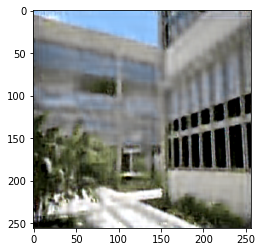

In [12]:
output = model.predict(img_array)


imshow(output[0].reshape(SIZE,SIZE,3), cmap="gray")